# Homework 2

## Dataset

In [ ]:
import os
from google.colab import drive

import sys
from time import time

drive.mount('/content/drive')

# make sure to have the correct path
dataset_raw = '/content/drive/My Drive/big data computing/datasets/HW2_dataset/corpus.txt'
labels_raw = '/content/drive/My Drive/big data computing/datasets/HW2_dataset/labels.txt'

print(dataset_raw)
print(labels_raw)

n_sample = 30

Mounted at /content/drive
/content/drive/My Drive/big data computing/datasets/HW2_dataset/corpus.txt
/content/drive/My Drive/big data computing/datasets/HW2_dataset/labels.txt


### Let's make a list for the dataset

In [ ]:
file_data = open(dataset_raw, 'r') 
Lines = file_data.readlines() 
dataset = []

count = 0
# Strips the newline character 
for line in Lines: 
  count += 1
  dataset.append(line.strip())
    
print(count)

314808


In case we want sampling

In [ ]:
'''
file_data = open(dataset_raw, 'r') 
Lines = file_data.readlines() 
dataset = []

count = 0
sample = 0
# Strips the newline character 
for line in Lines: 
  if sample == n_sample:
    dataset.append(line.strip())
    count += 1
    sample = 0
  sample += 1
    
print(count)
'''

In [ ]:
for i in range(5):
  print(dataset[i])

I purchased the Trilogy with hoping my two cats, age 3 and 5 would be interested.  The 3 yr old cat was fascinated for about 15 minutes but when the same pictures came on, she got bored.  The 5 year old watched for about a few minutes but then walked away. It is possible that because we have a wonderful courtyard full of greenery and trees and one of my neighbors has a bird feeder, that there is enough going on outside that they prefer real life versus a taped version.  I will more than likely pass this on to a friend who has cats that don't have as much wildlife to watch as mine do.
Perfect for new parents. We were able to keep track of baby's feeding, sleep and diaper change schedule for the first two and a half months of her life. Made life easier when the doctor would ask questions about habits because we had it all right there!
There are usually one or more of my cats watching TV and staying out of trouble when this DVD is playing.  They seem to like the mice and birds the most an

### Let's make a list for the labels

In [ ]:
file_labels = open(labels_raw, 'r') 
Lines = file_labels.readlines() 
labels = []

count = 0
# Strips and convert to int the newline character 
for line in Lines: 
  count += 1
  labels.append(int(line.strip()))
    
print(count)

314808


In case we want sampling

In [ ]:
'''
file_labels = open(labels_raw, 'r') 
Lines = file_labels.readlines() 
labels = []

count = 0
sample = 0
# Strips the newline character 
for line in Lines: 
  if sample == n_sample:
    labels.append(int(line.strip()))
    count += 1
    sample = 0 
  sample += 1
    
print(count)
'''

In [ ]:
for i in range(5):
  print(labels[i])

1
0
1
1
0


Let's set the known number of classes

In [ ]:
import numpy as np

true_k = len(np.unique(labels)) 
print(f"k = {true_k}")

k = 2


## Text preprocessing

Clean text (remove puntuation, numbers, ...) and lower



In [ ]:
import re

for i in range(len(dataset)):
  dataset[i] = re.sub('[^A-Za-z]+', ' ', dataset[i]).lower()

In [ ]:
for i in range(5):
  print(dataset[i])

i purchased the trilogy with hoping my two cats age and would be interested the yr old cat was fascinated for about minutes but when the same pictures came on she got bored the year old watched for about a few minutes but then walked away it is possible that because we have a wonderful courtyard full of greenery and trees and one of my neighbors has a bird feeder that there is enough going on outside that they prefer real life versus a taped version i will more than likely pass this on to a friend who has cats that don t have as much wildlife to watch as mine do 
perfect for new parents we were able to keep track of baby s feeding sleep and diaper change schedule for the first two and a half months of her life made life easier when the doctor would ask questions about habits because we had it all right there 
there are usually one or more of my cats watching tv and staying out of trouble when this dvd is playing they seem to like the mice and birds the most and maybe go a little less s

Lemmatization (complete version - execution requires really long time) 

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


lemmatizer = WordNetLemmatizer()
for i in range(len(dataset)):
    dataset[i] = lemmatize_sentence(dataset[i]) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Lemmatization (simple version - faster execution but fixes only verbs) 

In [ ]:
'''
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


import nltk
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
for i in range(len(dataset)):
    word_list = word_tokenize(dataset[i])
    lemmatized_doc = ""
    for word in word_list:
        lemmatized_doc = lemmatized_doc + " " + lemmatizer.lemmatize(word, pos = 'v') #let's prioritize verbs that might cause more inaccuracy
    dataset[i] = lemmatized_doc 
''' 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
for i in range(5):
  print(dataset[i])

i purchase the trilogy with hop my two cat age and would be interested the yr old cat be fascinate for about minute but when the same picture come on she get bore the year old watch for about a few minute but then walk away it be possible that because we have a wonderful courtyard full of greenery and tree and one of my neighbor have a bird feeder that there be enough go on outside that they prefer real life versus a taped version i will more than likely pas this on to a friend who have cat that don t have as much wildlife to watch as mine do
perfect for new parent we be able to keep track of baby s feed sleep and diaper change schedule for the first two and a half month of her life make life easier when the doctor would ask question about habit because we have it all right there
there be usually one or more of my cat watch tv and stay out of trouble when this dvd be play they seem to like the mouse and bird the most and maybe go a little less stir crazy be inside all the time
i buy th

Let's convert the corpus into tf-idf vectors 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

min_df = 5            #ignore terms that have a document frequency strictly lower than the given threshold (value found by heuristic)
max_df = 1.           #ignore terms that have a document frequency strictly higher than the given threshold

vectorizer = TfidfVectorizer(stop_words='english', max_df=max_df, min_df=min_df) ## Corpus is in English
X = vectorizer.fit_transform(dataset)

Resulting matrix shape (#documents, #considered_terms)

In [ ]:
print(X.shape)

(314808, 22553)


# Cloustering - first attempt: only MiniBatchKMeans

MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time. It  produces results that are generally only slightly worse than the standard algorithm

In [ ]:
from sklearn.cluster import MiniBatchKMeans

km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100)
t0 = time()
km.fit(X)  
print("done in %0.3fs" % (time() - t0))

done in 4.449s


In [ ]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.373
Completeness: 0.416
V-measure: 0.393
Adjusted Rand-Index: 0.365
Silhouette Coefficient: 0.006


Since kmeans gives a random label to each class and we have only 2 classes, the accuracy is actually given by the maximum between the value found by the function and the inverse (kmeans exchanged the labels)

In [ ]:
acc = metrics.accuracy_score(labels, km.labels_)
inverse = 1 - acc

print("Accuracy: %0.3f" % max(acc, inverse))

Accuracy: 0.802


# WordCloud from first attempt

Let's check the shape. We have 2 for the centroids and the dimensions as before

In [ ]:
print(km.cluster_centers_.shape)

(2, 22553)


Now we can extract the most important words inside the clousters

In [ ]:
centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
important = []

for i in range(true_k):
    print("Cluster %d:" % i, end='')
    important.append("")
    for ind in centroids[i, :50]:
        print(' %s' % terms[ind], end='')
        important[i] += terms[ind] + " "
    print()

Cluster 0: dog cat toy love food treat like chew good eat product buy use just great make play small litter time ball work really try day don little box think puppy large recommend size long smell price year big old ve pet look doesn thing come know say easy teeth bag
Cluster 1: use baby great love like easy work just buy month good little make bottle time old product really seat fit son bag diaper don look need daughter clean hold nice small think wash size come recommend soft thing water purchase try car price big cup perfect cover doesn stroller toy


Wordcloud Topic 0

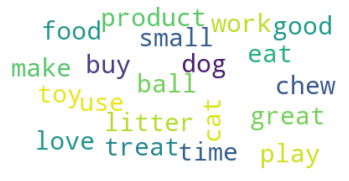

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
% matplotlib inline

stopwords = set(STOPWORDS) #we may remove the stopwords that do not give real meaning
wordcloud = WordCloud(max_font_size=30, max_words=20, stopwords=stopwords, background_color="white").generate(important[0])

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Wordcloud Topic 1

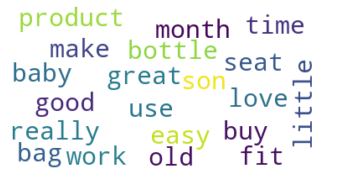

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
% matplotlib inline

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=30, max_words=20, stopwords=stopwords, background_color="white").generate(important[1])

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Cloustering - second attempt: SVD + MiniBatchKMeans

In [ ]:
print("The original data have", X.shape[1], "dimensions/features/terms")

The original data have 22553 dimensions/features/terms


Let's apply the SVD taking in consideration that each non-zero singualr value corresponds to a topic for the document

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD

r = true_k  #cause each non-zero singualr value corresponds to a topic for the document
t0 = time()

svd = TruncatedSVD(r)
normalizer = Normalizer(copy=False)   #rescaling in order to have unit norm (avoid errors with euclidean distance and cosine distance)
lsa = make_pipeline(svd, normalizer)  
Y = lsa.fit_transform(X)              #actually compute SVD and project the original data onto the directions of the singualr vectors we found

print("done in %fs" % (time() - t0))
print(svd.explained_variance_ratio_)

done in 3.085355s
[0.00295971 0.00882802]


Here we can see that now the number of features corresponds to the number of possible topics

In [ ]:
print("The number of documents is still", Y.shape[0])
print("The number of dimension has become", Y.shape[1])

The number of documents is still 314808
The number of dimension has become 2


Run MiniBatchKMeans on the output of the SVD. MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time. It  produces results that are generally only slightly worse than the standard algorithm

In [ ]:
from sklearn.cluster import MiniBatchKMeans

km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=100)
t0 = time()
km.fit(Y)   #we are using the output of the SVD
print("done in %0.3fs" % (time() - t0))

done in 1.819s


In [ ]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.427
Completeness: 0.446
V-measure: 0.436
Adjusted Rand-Index: 0.475
Silhouette Coefficient: 0.005


Since kmeans gives a random label to each class and we have only 2 classes, the accuracy is actually given by the maximum between the value found by the function and the inverse (kmeans exchanged the labels)

In [ ]:
acc = metrics.accuracy_score(labels, km.labels_)
inverse = 1 - acc

print("Accuracy: %0.3f" % max(acc, inverse))

Accuracy: 0.844


# WordCloud from second attempt

Let's check the shape. We have 2 for the centroids and for the dimenstions as we set for the SVD 

In [ ]:
print(km.cluster_centers_.shape)

(2, 2)


We therefore need to "project" back to the original space

In [ ]:
original_centroids = svd.inverse_transform(km.cluster_centers_)
print(original_centroids.shape) ## Just a sanity check
for i in range(original_centroids.shape[0]):
    original_centroids[i] = np.array([x for x in original_centroids[i]])
svd_centroids = original_centroids.argsort()[:, ::-1]

(2, 22553)


Now we can extract the most important words inside the clousters

In [ ]:
terms = vectorizer.get_feature_names()
important = []

for i in range(true_k):
    print("Cluster %d:" % i, end='')
    important.append("")
    for ind in svd_centroids[i, :50]: #let's use more in case we find stop words
        print(' %s' % terms[ind], end='')
        important[i] += terms[ind] + " "
    print()

Cluster 0: dog cat love food toy like treat good product great eat buy just use chew make small time work play really little try don think size ball day old recommend large price look long big puppy bag thing month year easy doesn smell ve come litter say know box pet
Cluster 1: use baby great love like easy just seat buy month work bottle little make old time really good fit product son diaper bag don look car need clean hold daughter stroller think wash small toy size nice thing come recommend big try cup soft cover purchase doesn ve water want


Wordcloud Topic 0

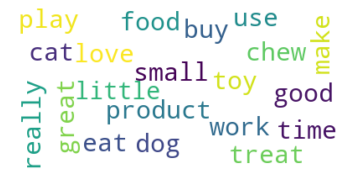

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
% matplotlib inline

stopwords = set(STOPWORDS) #we may remove the stopwords that do not give real meaning
wordcloud = WordCloud(max_font_size=30, max_words=20, stopwords=stopwords, background_color="white").generate(important[0])

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Wordcloud Topic 1

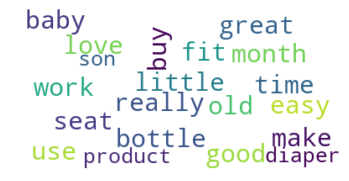

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
% matplotlib inline

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=30, max_words=20, stopwords=stopwords, background_color="white").generate(important[1])

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Cloustering - third attempt: SVD + KMeans

For completeness let's try with the standard Kmeans++

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100)
t0 = time()
km.fit(Y)   #we are using the output of the SVD
print("done in %0.3fs" % (time() - t0))

done in 1.519s


In [ ]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.428
Completeness: 0.447
V-measure: 0.437
Adjusted Rand-Index: 0.477
Silhouette Coefficient: 0.006


Again, since kmeans gives a random label to each class and we have only 2 classes, the accuracy is actually given by the maximum between the value found by the function and the inverse (kmeans exchanged the labels)

In [ ]:
acc = metrics.accuracy_score(labels, km.labels_)
inverse = 1 - acc

print("Accuracy: %0.3f" % max(acc, inverse))

Accuracy: 0.845


# WordCloud from third attempt

Let's check the shape. We have 2 for the centroids and for the dimenstions as we set for the SVD 

In [ ]:
print(km.cluster_centers_.shape)

(2, 2)


We therefore need to "project" back to the original space

In [ ]:
original_centroids = svd.inverse_transform(km.cluster_centers_)
print(original_centroids.shape) ## Just a sanity check
for i in range(original_centroids.shape[0]):
    original_centroids[i] = np.array([x for x in original_centroids[i]])
svd_centroids = original_centroids.argsort()[:, ::-1]

(2, 22553)


Now we can extract the most important words inside the clousters

In [ ]:
terms = vectorizer.get_feature_names()
important = []

for i in range(true_k):
    print("Cluster %d:" % i, end='')
    important.append("")
    for ind in svd_centroids[i, :50]: #let's use more in case we find stop words
        print(' %s' % terms[ind], end='')
        important[i] += terms[ind] + " "
    print()

Cluster 0: dog cat love food toy like treat good product great eat buy use just chew make small time work play really little try don think size ball day old recommend large price look long big month bag puppy thing easy year doesn ve come smell litter say know box pet
Cluster 1: use baby great love like easy just seat month buy work bottle little make old time really good fit son product diaper bag don car look need clean hold daughter stroller think wash small toy size nice thing come recommend big cup try soft cover purchase doesn ve water want


Wordcloud Topic 0

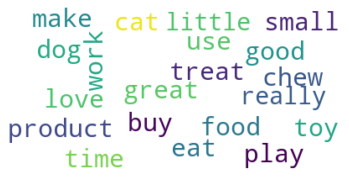

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
% matplotlib inline

stopwords = set(STOPWORDS) #we may remove the stopwords that do not give real meaning
wordcloud = WordCloud(max_font_size=30, max_words=20, stopwords=stopwords, background_color="white").generate(important[0])

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Wordcloud Topic 1

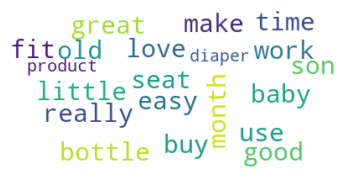

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
% matplotlib inline

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=30, max_words=20, stopwords=stopwords, background_color="white").generate(important[1])

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()